In [ ]:
zip_file_path = '/content/colored.zip'

# Specify the directory where you want to extract the contents
extracted_path = '/content/colored'

# Use the ! operator to run the unzip command
!unzip $zip_file_path -d $extracted_path

Archive:  /content/colored.zip
  inflating: /content/colored/colored/1000.jpg  
  inflating: /content/colored/colored/1005.jpg  
  inflating: /content/colored/colored/1015.jpg  
  inflating: /content/colored/colored/1023.jpg  
  inflating: /content/colored/colored/1030.jpg  
  inflating: /content/colored/colored/1033.jpg  
  inflating: /content/colored/colored/104.jpg  
  inflating: /content/colored/colored/1056.jpg  
  inflating: /content/colored/colored/1059.jpg  
  inflating: /content/colored/colored/106.jpg  
  inflating: /content/colored/colored/1073.jpg  
  inflating: /content/colored/colored/1077.jpg  
  inflating: /content/colored/colored/1078.jpg  
  inflating: /content/colored/colored/108.jpg  
  inflating: /content/colored/colored/1088.jpg  
  inflating: /content/colored/colored/1094.jpg  
  inflating: /content/colored/colored/1099.jpg  
  inflating: /content/colored/colored/1100.jpg  
  inflating: /content/colored/colored/1120.jpg  
  inflating: /content/colored/colored/112

In [ ]:
zip_file_path = '/content/Black_White.zip'

# Specify the directory where you want to extract the contents
extracted_path = '/content/Black'

# Use the ! operator to run the unzip command
!unzip $zip_file_path -d $extracted_path

Archive:  /content/Black_White.zip
 extracting: /content/Black/Black_White/Gray_1000.jpg  
 extracting: /content/Black/Black_White/Gray_1005.jpg  
 extracting: /content/Black/Black_White/Gray_1015.jpg  
 extracting: /content/Black/Black_White/Gray_1023.jpg  
 extracting: /content/Black/Black_White/Gray_1030.jpg  
 extracting: /content/Black/Black_White/Gray_1033.jpg  
 extracting: /content/Black/Black_White/Gray_104.jpg  
 extracting: /content/Black/Black_White/Gray_1056.jpg  
 extracting: /content/Black/Black_White/Gray_1059.jpg  
 extracting: /content/Black/Black_White/Gray_106.jpg  
 extracting: /content/Black/Black_White/Gray_1073.jpg  
 extracting: /content/Black/Black_White/Gray_1077.jpg  
 extracting: /content/Black/Black_White/Gray_1078.jpg  
 extracting: /content/Black/Black_White/Gray_108.jpg  
 extracting: /content/Black/Black_White/Gray_1088.jpg  
 extracting: /content/Black/Black_White/Gray_1094.jpg  
 extracting: /content/Black/Black_White/Gray_1099.jpg  
 extracting: /co

In [ ]:
import numpy as np # linear algebra


from IPython.display import display, Image
from matplotlib.pyplot import imshow
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, load_img
from skimage.color import lab2rgb, rgb2lab
from skimage import color
import keras as keras
import tensorflow as tf
import glob
import cv2 as cv2
import os
import pdb
import matplotlib.pyplot as plt

In [ ]:

folder_path='/content/Black/Black_White'
images1 = []
for img in os.listdir(folder_path):
    img=folder_path+"/"+img
    img = load_img(img, target_size=(100,100))
    img = img_to_array(img)/ 255
    X= color.rgb2gray(img)
    images1.append(X)
#pdb.set_trace()

folder_path='/content/colored/colored'
images2 = []
for img in os.listdir(folder_path):
    #print(folder_path+img)
    img=folder_path+"/"+img
    img = load_img(img, target_size=(100,100))
    img = img_to_array(img)/ 255
    lab_image = rgb2lab(img)
    lab_image_norm = (lab_image + [0, 128, 128]) / [100, 255, 255]
    # The input will be the black and white layer
    Y = lab_image_norm[:,:,1:]

    images2.append(Y)
#pdb.set_trace()


X = np.array(images1)
Y = np.array(images2)
#pdb.set_trace()







**MODEL**


In [ ]:
x1 = keras.Input(shape=(100, 100, 1))

x2 = Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(x1)
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
x4 = Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(x3)#default stride=1
x5 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)#'same' padding means that the spatial dimensions of the output feature map will be the same as the input feature map.
x6 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)(x5)
x7 = UpSampling2D((2, 2))(x6)
x8 = Conv2D(32, (3, 3), activation='relu', padding='same')(x7)
x9 = UpSampling2D((2, 2))(x8)
x10 = Conv2D(16, (3, 3), activation='relu', padding='same')(x9)
x11 = UpSampling2D((2, 2))(x10)
x12 = Conv2D(2, (3,3), activation='sigmoid', padding='same')(x11)#here we are predicting the two dimensions a*,b*

x12=tf.reshape(x12,(104,104,2))

x12 = tf.image.resize(x12,[100, 100])

x12=tf.reshape(x12,(1,100, 100,2))


# Finish model


In [ ]:
model = keras.Model(x1, x12)

model.compile(optimizer='rmsprop', loss='mse')
#model.fit(X,Y, batch_size=1, epochs=500, verbose=1)


#pdb.set_trace()


history = model.fit(X, Y, batch_size=1, epochs=10, verbose=1)
lo=model.evaluate(X, Y, batch_size=1)
# Plot the loss
model.summary()


Epoch 1/10
640/640 [==============================] - 17s 24ms/step - loss: 0.0022
Epoch 2/10
640/640 [==============================] - 14s 23ms/step - loss: 0.0022
Epoch 3/10
640/640 [==============================] - 15s 23ms/step - loss: 0.0022
Epoch 4/10
640/640 [==============================] - 16s 24ms/step - loss: 0.0022
Epoch 5/10
640/640 [==============================] - 14s 23ms/step - loss: 0.0021
Epoch 6/10
640/640 [==============================] - 15s 23ms/step - loss: 0.0021
Epoch 7/10
640/640 [==============================] - 15s 23ms/step - loss: 0.0021
Epoch 8/10
640/640 [==============================] - 14s 22ms/step - loss: 0.0021
Epoch 9/10
640/640 [==============================] - 15s 24ms/step - loss: 0.0021
Epoch 10/10
640/640 [==============================] - 6s 10ms/step - loss: 0.0021
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)

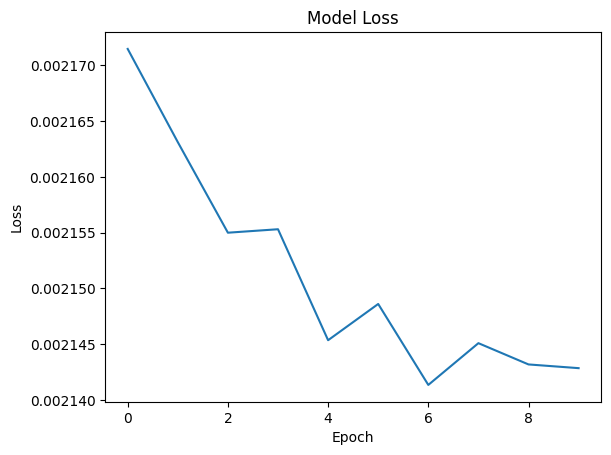

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
from tensorflow.keras.utils import plot_model

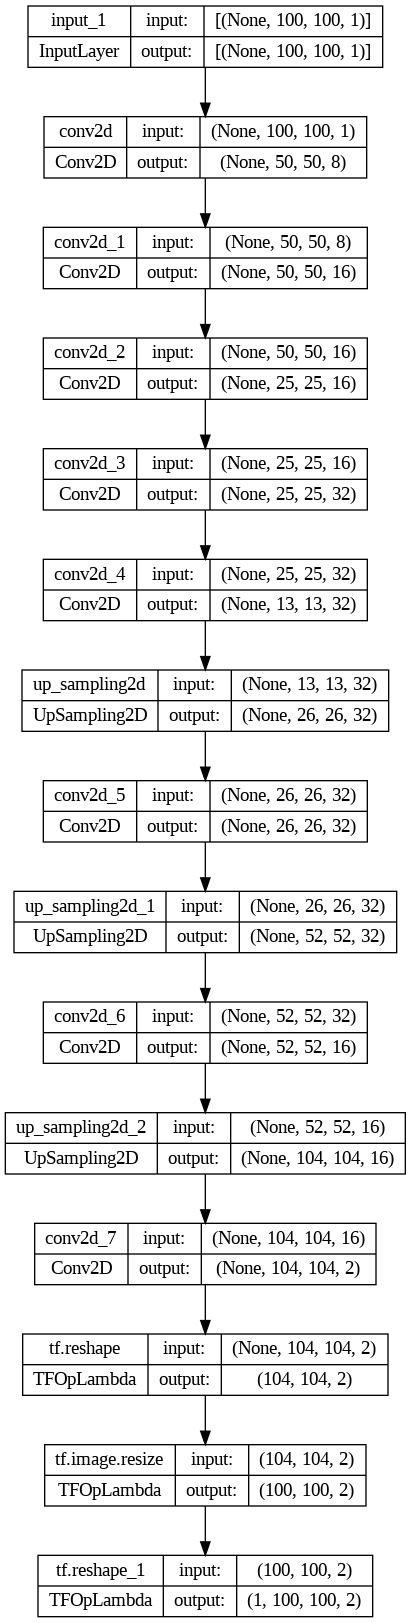

In [ ]:
plot_model(model, show_shapes = True)

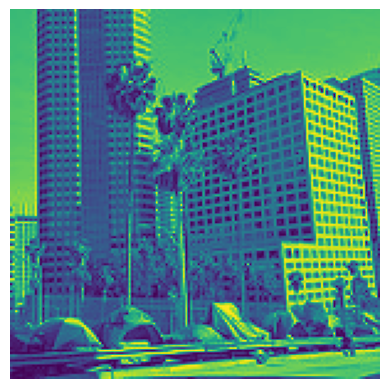

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image using PIL
image = Image.open("/content/1018.jpg")  # Replace "your_image.jpg" with the path to your image file

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

***********
[[0.67058825]
 [0.6784314 ]
 [0.68235296]
 [0.68235296]
 [0.6784314 ]
 [0.6862745 ]
 [0.6901961 ]
 [0.13725491]
 [0.1882353 ]
 [0.28627452]
 [0.4627451 ]
 [0.29411766]
 [0.40392157]
 [0.39215687]
 [0.35686275]
 [0.23137255]
 [0.41568628]
 [0.99607843]
 [0.4392157 ]
 [0.21568628]
 [0.19215687]
 [0.2627451 ]
 [0.26666668]
 [0.2627451 ]
 [0.14901961]
 [0.38039216]
 [0.40784314]
 [0.28627452]
 [0.3647059 ]
 [0.32156864]
 [0.34509805]
 [0.3254902 ]
 [0.30588236]
 [0.9882353 ]
 [0.93333334]
 [0.67058825]
 [0.7137255 ]
 [0.8235294 ]
 [0.67058825]
 [0.7058824 ]
 [0.6627451 ]
 [0.7019608 ]
 [0.6784314 ]
 [0.68235296]
 [0.68235296]
 [0.68235296]
 [0.68235296]
 [0.68235296]
 [0.6784314 ]
 [0.6784314 ]
 [0.6784314 ]
 [0.6745098 ]
 [0.6745098 ]
 [0.68235296]
 [0.68235296]
 [0.68235296]
 [0.68235296]
 [0.68235296]
 [0.6784314 ]
 [0.68235296]
 [0.6627451 ]
 [0.6784314 ]
 [0.6       ]
 [0.6901961 ]
 [0.6862745 ]
 [0.69411767]
 [0.69411767]
 [0.69803923]
 [0.6901961 ]
 [0.69411767]
 [0.6941

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 4 pixels
  return func(*args, **kwargs)


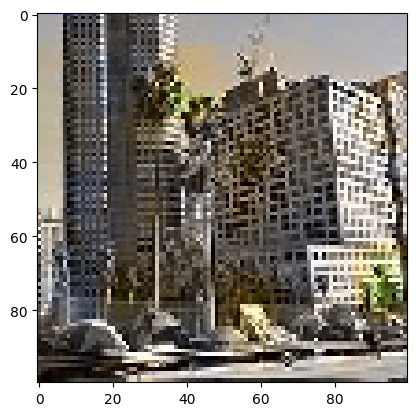

In [ ]:
folder_path='/content'
img='1018.jpg'
img=folder_path+"/"+img
img = load_img(img, target_size=(100,100),color_mode = "grayscale")
img = img_to_array(img)/ 255

print("***********")
print(img[0])

ss=img.shape
X = np.array(img)
X = np.expand_dims(X, axis=2)
print("***********")
print(X)

X=np.reshape(X,(1,100,100,1))
print("***********")
print(X)
output = model.predict(X)

print("***********")
print(output[0])
output=np.reshape(output,(100,100,2))
output=cv2.resize(output,(ss[1],ss[0]))
AB_img = output
outputLAB = np.zeros((ss[0],ss[1], 3))
img=np.reshape(img,(100,100))
outputLAB[:,:,0]=img
outputLAB[:,:,1:]=AB_img
outputLAB = (outputLAB * [100, 255, 255]) - [0, 128, 128]#denormalization
rgb_image = lab2rgb(outputLAB)

import matplotlib.pyplot as plt

imshow(rgb_image)
plt.show()